<a href="https://colab.research.google.com/github/anjaleeDS/MLCS68/blob/master/hw3_nlp_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Womens%20Clothing%20E-Commerce%20Reviews%20-%20Womens%20Clothing%20E-Commerce%20Reviews.csv')
data.head()

,Age,Title,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


The homework is to use the Review Text (and any other feature's you'd like) to predict whether someone will recommend (Recommended IND) a product or not.

## Have fun!

You are also welcome to use AutoML if you'd prefer (or both! :)

In [4]:
data['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

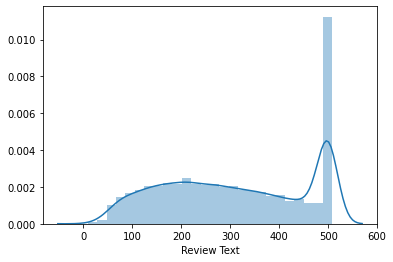

In [5]:
## length of the Text using KDEplot
length = data['Review Text'].str.len()
sns.distplot(length)
plt.show()

## rename columns to one word



In [6]:
data.columns = [c.replace(' ', '_') for c in data.columns]
# data.columns
data.count() # many of the rows have different counts
data.fillna('0', inplace=True)
data.count()

Age                23486
Title              23486
Review_Text        23486
Recommended_IND    23486
Division_Name      23486
Department_Name    23486
Class_Name         23486
dtype: int64

## Look at the data

In [47]:
data.Department_Name.value_counts()
# recommend IND
# sns.countplot(data=data, x='Recommended_IND')
# sns.countplot(data=data, x='Department_Name', hue='Department_Name')
# sns.pairplot( data = data)


Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
0              14
Name: Department_Name, dtype: int64

## Clean up the text corpus!

numbers, tokenize, lemmatization/stop words, lowercasing



### recommendation text

In [127]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [130]:
decontracted("y'all cray the big deal?")

"y'all cray the big deal?"

In [132]:
lemmatizer = WordNetLemmatizer()
stopwordslist = set(stopwords.words('english'))
cleaned_reviews = list()

for line in data.Review_Text:
  # get rid of the contractions
    decontracted(line)

  # if (pd.isna(line)!=True or line!=''): 
  # numbers out
    text = re.sub('[^a-zA-Z]', " ", str(line)) 
  # lower
    text = text.lower() 
  # tokenize
    text = word_tokenize(text, language='english') 
  # lemmatize and stopwords
    text = [lemmatizer.lemmatize(word) for word in text if (word) not in stopwordslist]
    text = " ".join(text)
    cleaned_reviews.append(text)


In [10]:
data.insert(7,'Cleaned_Reviews', cleaned_reviews)
# drop Review text in the future

### title text

In [82]:
lemmatizer = WordNetLemmatizer()
stopwordslist = set(stopwords.words('english'))
cleaned_titles = list()

for line in data.Title:
  # get rid of the nans    
  # if (pd.isna(line)!=True or line!=''): 
  # numbers out
    text = re.sub('[^a-zA-Z]', " ", str(line)) 
  # lower
    text = text.lower() 
  # tokenize
    text = word_tokenize(text, language='english') 
  # lemmatize and stopwords
    text = [lemmatizer.lemmatize(word) for word in text if (word) not in stopwordslist]
    text = " ".join(text)
    cleaned_titles.append(text)


In [85]:
cleaned_titles
data.insert(7,'Cleaned_Titles', cleaned_titles)


In [137]:
cleaned_reviews

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
 'love tracy reese dress one petite foot tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work return

## Create the bag of word model for Review text only

In [11]:
cv = CountVectorizer(max_features=(1000))
X = cv.fit_transform(cleaned_reviews).toarray()

pd.DataFrame(X, columns=cv.get_feature_names())

,able,absolutely,across,actually,add,added,addition,adjustable,adorable,adore,afraid,ag,ago,agree,airy,almost,alone,along,already,also,although,always,amazing,amount,ankle,another,anyone,anything,anyway,anywhere,apart,appear,appears,appreciate,appropriate,area,arm,armhole,armpit,around,...,went,whether,whim,white,whole,wide,wider,wine,winner,winter,wish,without,woman,wonderful,wonderfully,wool,wore,work,worked,worn,worried,worry,worth,would,wow,wrap,wrinkle,wrinkled,wrong,xl,xsp,xx,xxsp,year,yellow,yes,yesterday,yet,zip,zipper
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23483,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
data.Class_Name.value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
0                   14
Casual bottoms       2
Chemises             1
Name: Class_Name, dtype: int64

## Adding some more features to go into evaluation matrix

In [ ]:
data.Cleaned_Reviews, data.Cleaned_Titles

In [133]:
#use pd mapper
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

mapper = DataFrameMapper([
  # (['Age'],None), # (23486, 1000))
  ('Department_Name', sklearn.preprocessing.LabelBinarizer()),
  # ('Class_Name', sklearn.preprocessing.LabelBinarizer()),
  # ('Division_Name', sklearn.preprocessing.LabelBinarizer()),
  (('Title', CountVectorizer(max_features=(1000)))),
  # (('Cleaned_Titles', CountVectorizer(max_features=(1000)))),
  (('Cleaned_Reviews', CountVectorizer(max_features=(1000))))
])
out = np.round(mapper.fit_transform(data.copy()))
# mapper.transformed_names_

In [ ]:
pd.DataFrame(out), mapper.transformed_names_

### Try to make a new test set with the added features

In [134]:
y= data['Recommended_IND']

## replaced X with out
X_train, X_test, y_train, y_test = train_test_split(out, y , test_size=0.25, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.25, random_state = 0)

In [135]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape, X.shape 

((13210, 2007),
 (5872, 2007),
 (13210,),
 (5872,),
 (4404, 2007),
 (4404,),
 (23486, 1000))

## Split into training sets - *cleaned review data set ONLY*

In [58]:
y= data['Recommended_IND']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.25, random_state = 0)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_valid.shape, y_valid.shape, X.shape 

((13210, 1000),
 (5872, 1000),
 (13210,),
 (5872,),
 (4404, 1000),
 (4404,),
 (23486, 1000))

## Naives Bayes Multinomial

In [136]:
## Naives bayes multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred_nb = clf.predict(X_valid)

fpr_nb, tpr_nb, thresholds = metrics.roc_curve(y_valid, Y_pred_nb)
print('AUC: ', metrics.auc(fpr_nb, tpr_nb))
print(classification_report(y_valid, Y_pred_nb))
print(confusion_matrix(y_valid, Y_pred_nb))

AUC:  0.8649954089865761
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       751
           1       0.96      0.90      0.93      3653

    accuracy                           0.89      4404
   macro avg       0.80      0.86      0.83      4404
weighted avg       0.91      0.89      0.90      4404

[[ 621  130]
 [ 354 3299]]


only dept, Creviews, titles = auc.865 acc.89 p0.64 r0.83 f0.72
---
---

no age ctitle creview = auc .85 acc .89 p0.63 r0.79 f0.70

no age             = auc .862 acc .89 p0.63 r0.82 f0.72

no division name    =     auc .855 acc .89 p0.62 r0.81 f0.71

no division/no title = auc .815 acc .88 p0.61 r0.72 f0.66


all/ age not scaled  = auc .855 acc .89 p0.63 r0.81 f0.71



TEXT ONLY results
```
AUC:  0.8200147772675032
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       751
           1       0.94      0.91      0.92      3653

    accuracy                           0.88      4404
   macro avg       0.78      0.82      0.80      4404
weighted avg       0.89      0.88      0.88      4404

[[ 552  199]
 [ 347 3306]]
```



## logistic regression

In [41]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_lr = logreg.predict(X_valid)

fpr_lr, tpr_lr, _ = metrics.roc_curve(y_valid, pred_lr)
print('Logistic regression AUC: ', metrics.auc(fpr_lr, tpr_lr))
print(classification_report(y_valid, pred_lr))
print(confusion_matrix(y_valid, pred_lr))

Logistic regression AUC:  0.7653314150345392
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       751
           1       0.92      0.95      0.93      3653

    accuracy                           0.89      4404
   macro avg       0.81      0.77      0.78      4404
weighted avg       0.88      0.89      0.88      4404

[[ 438  313]
 [ 192 3461]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Division name out  =  auc.806, P0.73 r0.66 f0.70 accuracy.82

Division /Title out = auc.765, p0.7 r0.58 f0.63 accuracy .89

LR with cleaned text only

```
Logistic regression AUC:  0.7678576570777242
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       751
           1       0.92      0.95      0.93      3653

    accuracy                           0.89      4404
   macro avg       0.81      0.77      0.79      4404
weighted avg       0.88      0.89      0.88      4404

[[ 442  309]
 [ 193 3460]]
 ```


## random forest

In [22]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_valid)

fpr_rf, tpr_rf, _ = metrics.roc_curve(y_valid, pred_rf)
print('Random Forest AUC: ', metrics.auc(fpr_rf, tpr_rf))
print(classification_report(y_valid, pred_rf))
print(confusion_matrix(y_valid, pred_rf))

Random Forest AUC:  0.6684555641296595
              precision    recall  f1-score   support

           0       0.80      0.36      0.49       751
           1       0.88      0.98      0.93      3653

    accuracy                           0.87      4404
   macro avg       0.84      0.67      0.71      4404
weighted avg       0.87      0.87      0.85      4404

[[ 267  484]
 [  68 3585]]


RF with cleaned text only

```
Random Forest AUC:  0.6599559014843973
              precision    recall  f1-score   support

           0       0.80      0.34      0.47       751
           1       0.88      0.98      0.93      3653

    accuracy                           0.87      4404
   macro avg       0.84      0.66      0.70      4404
weighted avg       0.87      0.87      0.85      4404

[[ 253  498]
 [  62 3591]]
 ```

In [23]:
y_valid.shape, pred_rf.shape, X_train.shape, X_test.shape, fpr_rf.shape, tpr_rf.shape

((4404,), (4404,), (13210, 1000), (5872, 1000), (3,), (3,))

## xgboost!

In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
print(xgb_model)
# pred_xgb =  xgb_model.predict_proba(X_test)[:, 1]
pred_xgb = xgb_model.predict(X_test)
auc_xgb = roc_auc_score(y_test, pred_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


## xgboost print out



In [25]:
print('XGBoost AUC: ', metrics.auc(fpr_xgb, tpr_xgb))
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))
# y_valid.shape, pred_xgb.shape, y_test.shape, X_train.shape, fpr_xgb.shape, tpr_xgb.shape

XGBoost AUC:  0.6270916147156997
[[ 279  747]
 [  86 4760]]
              precision    recall  f1-score   support

           0       0.76      0.27      0.40      1026
           1       0.86      0.98      0.92      4846

    accuracy                           0.86      5872
   macro avg       0.81      0.63      0.66      5872
weighted avg       0.85      0.86      0.83      5872



XGB with cleaned text only
```
XGBoost AUC:  0.6270916147156997
[[ 279  747]
 [  86 4760]]
              precision    recall  f1-score   support

           0       0.76      0.27      0.40      1026
           1       0.86      0.98      0.92      4846

    accuracy                           0.86      5872
   macro avg       0.81      0.63      0.66      5872
weighted avg       0.85      0.86      0.83      5872

```

## Print results of models

In [26]:
# print('Logistic regression AUC: ', metrics.auc(fpr_lr, tpr_lr))
# print(classification_report(y_valid, pred_lr))
# print(confusion_matrix(y_valid, pred_lr))